In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import folium
# import base64
# import os.path
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# from scipy.stats import chi2_contingency
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import LinearSVC
# from sklearn.cluster import KMeans
# # import tensorflow as tf
# # from tensorflow import keras
# # from tensorflow.keras import layers
# # from tensorflow.keras.layers.experimental import preprocessing
# # from tensorflow.keras.utils import to_categorical
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Date

## Trail Data

In [4]:
Trail_original = []
for year in range(2016, 2024):
    Trail_original.append(pandas.read_excel(f'Data/JournalData/Data_V2/{year}.xlsx'))

In [5]:
year = 2016
for data in Trail_original:
    print(year)
    data['date'] = data['date'] + ', ' + str(year) 
    print("data size: "+ str(data.size))
    print()
    year += 1

2016
data size: 98336

2017
data size: 88382

2018
data size: 85400

2019
data size: 82894

2020
data size: 18816

2021
data size: 39214

2022
data size: 44968

2023
data size: 27523



In [6]:
Trail_all = pandas.concat(Trail_original)
Trail_all = Trail_all.reset_index()
Trail_all = Trail_all.drop(columns=['index', 'Person #'])
Trail_all

,Hiker trail name,Hiker Journal Link,Journal Story,Start location,Destination,date,Today Miles,Latitude,Longitude,State,Total Shelters,Occurrence,Rank,Name,Started,Finished
0,Papa Bear,https://www.trailjournals.com//journal/entry/5...,test entry,Springer\n,view entry,"Feb 24, Wed, 2016",0.0,NaN,NaN,NaN,5,475.0,1.0,NaN,NaN,NaN
1,BrewPart2,https://www.trailjournals.com//journal/entry/5...,Trail leg acquisition will begin slowly and st...,NaN,view entry,"Dec 04, Fri, 2016",0.0,NaN,NaN,NaN,0,475.0,1.0,NaN,NaN,NaN
2,CitySlickah,https://www.trailjournals.com//journal/entry/5...,OK OK I know.....you think I'm not very good a...,"Front Royal, VA\n",view entry,"Mar 22, Tue, 2016",0.0,NaN,NaN,NaN,0,475.0,1.0,NaN,NaN,NaN
3,CitySlickah,https://www.trailjournals.com//journal/entry/5...,For the folks following this. I apologize for ...,zero 2\n,view entry,"Mar 21, Mon, 2016",0.0,NaN,NaN,NaN,0,475.0,1.0,NaN,NaN,NaN
4,CitySlickah,https://www.trailjournals.com//journal/entry/5...,The plan I to hike to Neel Gap today.We will p...,Lance Creek\n,view entry,"Mar 15, Tue, 2016",7.0,NaN,NaN,NaN,0,475.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34329,Foxy,https://trailjournals.com/Foxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Christina Robinson,"Mar 1, 2018",NaN
34330,little hiker,https://marietta avrus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
34331,Ginger Snap,https://trailjournals.com/GingerSnap2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Jessica Grooms,"Mar 26, 2018",NaN
34332,Casket,"https://Started: Mar 10, 2018",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
Trail_all.columns

Index(['Hiker trail name', 'Hiker Journal Link', 'Journal Story',
       'Start location', 'Destination', 'date', 'Today Miles', 'Latitude',
       'Longitude', 'State', 'Total Shelters', 'Occurrence', 'Rank', 'Name',
       'Started', 'Finished'],
      dtype='object')

In [8]:
Trail_all.count()

Hiker trail name      34334
Hiker Journal Link    34334
Journal Story         33307
Start location        30134
Destination           34080
date                  34081
Today Miles           34107
Latitude               4400
Longitude              4400
State                  4400
Total Shelters        34334
Occurrence            34084
Rank                  34084
Name                    205
Started                 202
Finished                136
dtype: int64

In [9]:
Trail_all.dtypes

Hiker trail name       object
Hiker Journal Link     object
Journal Story          object
Start location         object
Destination            object
date                   object
Today Miles           float64
Latitude               object
Longitude              object
State                  object
Total Shelters          int64
Occurrence            float64
Rank                  float64
Name                   object
Started                object
Finished               object
dtype: object

In [10]:
Trail_all = Trail_all.astype('string')
Trail_all['Today Miles'] = pandas.to_numeric(Trail_all['Today Miles'], errors='coerce')
Trail_all['Latitude'] = pandas.to_numeric(Trail_all['Latitude'], errors='coerce')
Trail_all['Longitude'] = pandas.to_numeric(Trail_all['Longitude'], errors='coerce')
Trail_all.astype({
    'Today Miles': float,
    'Latitude': float, 
    'Longitude': float,
    'Total Shelters': int
})

def convertdate(x):
    if pandas.notna(x):
        try:
            return datetime.strptime(x ,"%b %d, %a, %Y").date()
        
        except ValueError as e:
            print(x)
            print("Error:", e)
            return pandas.NA
    return x

Trail_all['date'] = Trail_all['date'].map(convertdate)
Trail_all

Feb 29, Mon, 2017
Error: day is out of range for month
Feb 29, Sat, 2021
Error: day is out of range for month
Feb 29, Sat, 2022
Error: day is out of range for month


,Hiker trail name,Hiker Journal Link,Journal Story,Start location,Destination,date,Today Miles,Latitude,Longitude,State,Total Shelters,Occurrence,Rank,Name,Started,Finished
0,Papa Bear,https://www.trailjournals.com//journal/entry/5...,test entry,Springer,view entry,2016-02-24,0.0,<NA>,<NA>,<NA>,5,475.0,1.0,<NA>,<NA>,<NA>
1,BrewPart2,https://www.trailjournals.com//journal/entry/5...,Trail leg acquisition will begin slowly and st...,<NA>,view entry,2016-12-04,0.0,<NA>,<NA>,<NA>,0,475.0,1.0,<NA>,<NA>,<NA>
2,CitySlickah,https://www.trailjournals.com//journal/entry/5...,OK OK I know.....you think I'm not very good a...,"Front Royal, VA",view entry,2016-03-22,0.0,<NA>,<NA>,<NA>,0,475.0,1.0,<NA>,<NA>,<NA>
3,CitySlickah,https://www.trailjournals.com//journal/entry/5...,For the folks following this. I apologize for ...,zero 2,view entry,2016-03-21,0.0,<NA>,<NA>,<NA>,0,475.0,1.0,<NA>,<NA>,<NA>
4,CitySlickah,https://www.trailjournals.com//journal/entry/5...,The plan I to hike to Neel Gap today.We will p...,Lance Creek,view entry,2016-03-15,7.0,<NA>,<NA>,<NA>,0,475.0,1.0,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34329,Foxy,https://trailjournals.com/Foxy,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,Christina Robinson,"Mar 1, 2018",<NA>
34330,little hiker,https://marietta avrus,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>
34331,Ginger Snap,https://trailjournals.com/GingerSnap2018,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,Jessica Grooms,"Mar 26, 2018",<NA>
34332,Casket,"https://Started: Mar 10, 2018",<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>


In [11]:
def getyear(x):
    if pandas.isna(x):
        return x
    return x.year
def getmonth(x):
    if pandas.isna(x):
        return x
    return x.month
column_to_move  = Trail_all.pop("date")
Trail_all.insert(0, "date", column_to_move)
Trail_all = Trail_all.sort_values('date')
Trail_all['year'] = Trail_all['date'].map(getyear)
Trail_all['month'] = Trail_all['date'].map(getmonth)
Trail_all

,date,Hiker trail name,Hiker Journal Link,Journal Story,Start location,Destination,Today Miles,Latitude,Longitude,State,Total Shelters,Occurrence,Rank,Name,Started,Finished,year,month
6237,2016-01-01,Blue,https://www.trailjournals.com//journal/entry/5...,I've been saving my first post for years.I had...,<NA>,finally2016,0.0,<NA>,<NA>,<NA>,42,1.0,4115.0,<NA>,<NA>,<NA>,2016,1
6948,2016-01-01,Road Runner and Will,https://www.trailjournals.com//journal/entry/5...,HI everyone. Happy New Year. My name is Jedi N...,<NA>,jedi night,0.0,<NA>,<NA>,<NA>,7,1.0,4115.0,<NA>,<NA>,<NA>,2016,1
35,2016-01-01,greentree,https://www.trailjournals.com//journal/entry/5...,To Friends & Family: I still pinch myself to...,,view entry,0.0,<NA>,<NA>,<NA>,4,475.0,1.0,<NA>,<NA>,<NA>,2016,1
4826,2016-01-01,Hazel,https://www.trailjournals.com//journal/entry/5...,It's 2016.Happy New Year! I am so excited. The...,<NA>,this is the year,0.0,<NA>,<NA>,<NA>,15,1.0,4115.0,<NA>,<NA>,<NA>,2016,1
6470,2016-01-01,Conductor,https://www.trailjournals.com//journal/entry/5...,"Two days ago, it was only a nagging question i...",<NA>,things happening fast,0.0,<NA>,<NA>,<NA>,32,1.0,4115.0,<NA>,<NA>,<NA>,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34329,NaN,Foxy,https://trailjournals.com/Foxy,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,Christina Robinson,"Mar 1, 2018",<NA>,NaN,NaN
34330,NaN,little hiker,https://marietta avrus,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
34331,NaN,Ginger Snap,https://trailjournals.com/GingerSnap2018,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,Jessica Grooms,"Mar 26, 2018",<NA>,NaN,NaN
34332,NaN,Casket,"https://Started: Mar 10, 2018",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


## Covid Data


In [22]:
Covid = pandas.read_csv(f'Data/Covid19Data/us.csv').sort_values('date')
Covid['date'] = Covid['date'].map(lambda x: datetime.strptime(str(x) ,"%Y-%m-%d").date())
Covid.sort_values('date')
Covid

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
1153,2023-03-19,103784916,1133826
1154,2023-03-20,103794703,1133964
1155,2023-03-21,103813076,1134177
1156,2023-03-22,103864888,1134913


In [23]:
Covid = Covid[Covid['date'] <= datetime(2023, 12, 31).date()]
Covid

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
1153,2023-03-19,103784916,1133826
1154,2023-03-20,103794703,1133964
1155,2023-03-21,103813076,1134177
1156,2023-03-22,103864888,1134913


In [14]:
Covid.dtypes

date      object
cases      int64
deaths     int64
dtype: object

# Visualization

## Number of journals per day and Daily growth in COVID-19 cases from 2017-2021

In [24]:
def calculate_daily_growth(total_numbers):
    daily_growth = [total_numbers[0]]
    for i in range(1, len(total_numbers)):
        growth = total_numbers[i] - total_numbers[i - 1]
        daily_growth.append(growth)
    return daily_growth

grouped_data = Trail_all.groupby(['date'])

# Create a subplot with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

x = []
y1 = []
y2 = []

for name, group in grouped_data:
    x.append(name[0])
    y1.append(len(group))

y2 = calculate_daily_growth(Covid['cases'])

# Add the first trace (Number of journals per day)
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='Number of journals per day'))

# Add the second trace (Daily growth in COVID-19 cases)
fig.add_trace(go.Scatter(x=Covid['date'], y=y2, mode='lines', name='Daily growth in COVID-19 cases'), secondary_y=True)

# Update layout for the subplot
fig.update_layout(
    autosize=True,
    width=1800,
    height=800,
    xaxis_title="Date",
    yaxis_title="Number of journals",
    title={
        'text': "Number of journals per day and Daily growth in COVID-19 cases from 2017-2021",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Set axis titles for the secondary y-axis
fig.update_yaxes(title_text="Daily growth in COVID-19 cases", secondary_y=True,  range=(0, max(y2)))

# Show the plot
fig.show()
fig.write_html("file.html")


## Time Series Analysis - Number of journals from 2017 - 2021

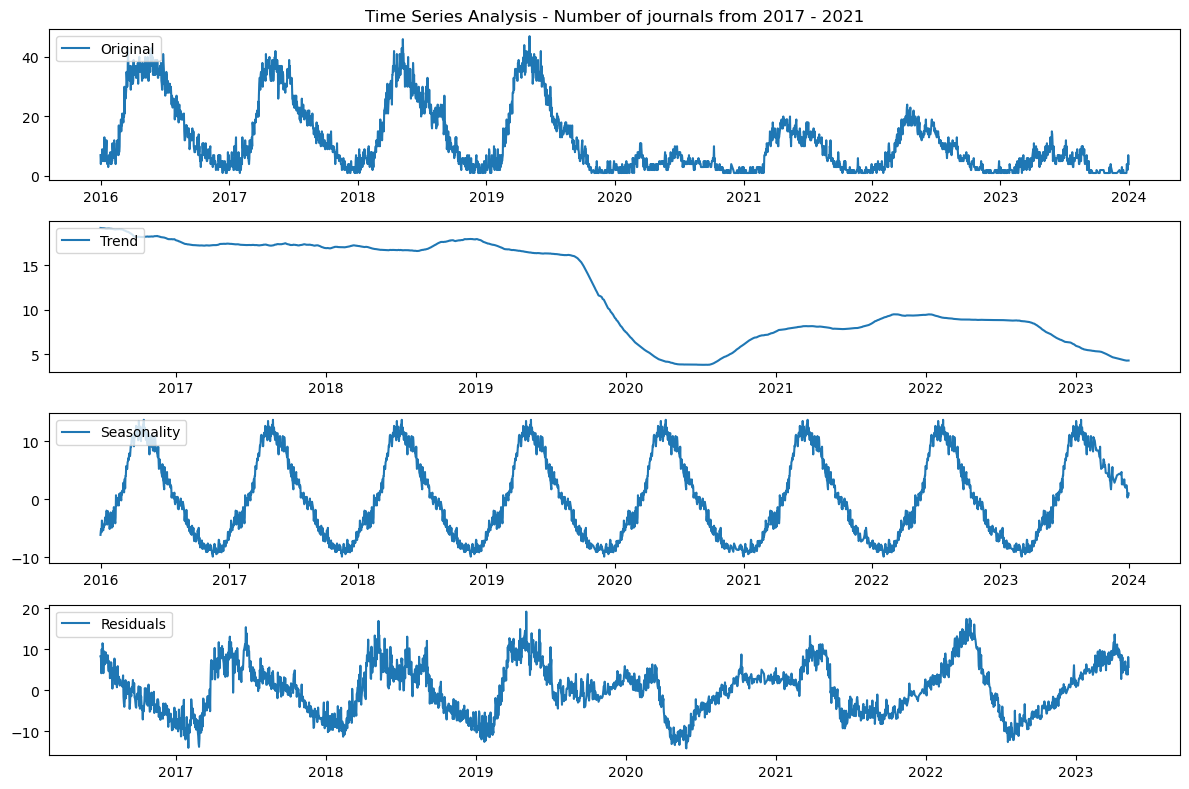

In [25]:
grouped_data = Trail_all.groupby(['date'])
fig = go.Figure()
x = []
y = []
for name, group in grouped_data:
    x.append(name[0])
    y.append(len(group))

df = pandas.DataFrame({'date': x, 'Value': y})
df['date'] = pandas.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Decompose the time series
result = seasonal_decompose(df['Value'], model='additive', period=365)  # Specify the seasonality period

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.title('Time Series Analysis - Number of journals from 2017 - 2021')
plt.plot(df['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()